Projet réalisé dans le cadre du cours de simulation numérique en physique par Diogo Ferreira Almeida et Thomas Mc Cleery

# BRUSSELATOR

Le Brusselator est un modèle décrivant des systèmes chimiques autocatalytiques imaginé par Ilya Prigogine à l'université libre de Bruxelles. Dans ce rapport nous analyserons d'abord le cas du Brusselator 0D, puis dans un deuxième temps, nous analyserons le cas du Brusselator 1D dans lequel un terme de diffusion spatiale a été rajouté.

## Le Brusselator 0D

Nous utilisons la méthode Runge-Kutta d'ordre 4 pour intégrer les équations suivantes :

$$
  \frac{du}{dt} = A+u^2v-Bu-u
$$
$$
  \frac{dv}{dt} = Bu-u^2v
$$

### Analyse des graphes pour différentes valeurs de B

En fixant $A = 1$ et en faisant varier les valeurs de $B$, on observe que les graphes des concentrations $u$-$v$ pour $B = 1, 1.5$ et $1.9$ convergent vers un point d'équilibre, ce qui est confirmé par la tendance de $u$ et $v$ à converger vers une constante en fonction du temps (nous démontrerons plus tard que les valeurs de cette constante sont bel et bien celles du point d'équilibre).
<br>
Mais en observant les graphes pour $B = 2.1, 3$ et $4$, on remarque qu'ils convergent vers un cycle limite et non un équilibre. Les concentrations évoluant en fonction du temps ne convergent désormais plus vers une constante mais oscillent indéfiniment, ce qui  correspond bel et bien à la création d'un cycle limite.
<br>
<br>
Le systéme subit donc une bifurcation aux alentours de $B = 2$ que l'on appelle bifurcation de Hopf, c'est-à-dire que le système passe de stable à instable à partir d'une valeur critique.
<br>
<br>
Le calcul suivant montre que le point d'équilibe est $p = (A,\frac{B}{A})$ et que la bifurcation se fait précisément à $B = 2$.
<br>
<br>
### Calcul de la bifurcation 
Equilibres
$$
  \frac{du}{dt} = A+u^2v-Bu-u = 0 \rightarrow u = A
$$
$$
  \frac{dv}{dt} = Bu-u^2v = 0 \rightarrow v = \frac{B}{A}
$$

Jacobienne 
$$
  J(A,\frac{B}{A}) = \begin{bmatrix} 2B-B-1 & A^2  \\ B-2B & -A^2 \end{bmatrix} = \begin{bmatrix} B-1 & A^2  \\ -B & -A^2 \end{bmatrix} 
$$

Valeurs propres (pour $A = 1$)
$$
  \lambda_{+,-} = -\frac{b}{2} \pm \frac{\sqrt{\Delta}}{2}      \textrm{avec $b = 2-B$ et $\Delta = B(B-2)$}
$$

Le système est stable lorsque Re($\lambda_{+,-}$) < 0 :
<br>
Si $B>2$, $\Delta \in \mathbb{R}$ et pour que le système soit stable, il faut que $ -\frac{b}{2} \pm \frac{\sqrt{\Delta}}{2} <0$ et par conséquent il faut que $2-B$ > $\sqrt{\Delta}$, ce qui est impossible car $2-B$ est négatif. Pour $B>2$, le système est donc instable. 
<br>
<br>
Si $B<2$, $\Delta \in \mathbb{C}$ et donc il faut que $\frac{-b}{2} <0$ $\rightarrow B<2$. Le système est stable pour $B<2$ et nous avons donc bel et bien une bifurcation en $B = 2$.
<br>
Plus généralement, le système est stable pour $B<A^2+1$.

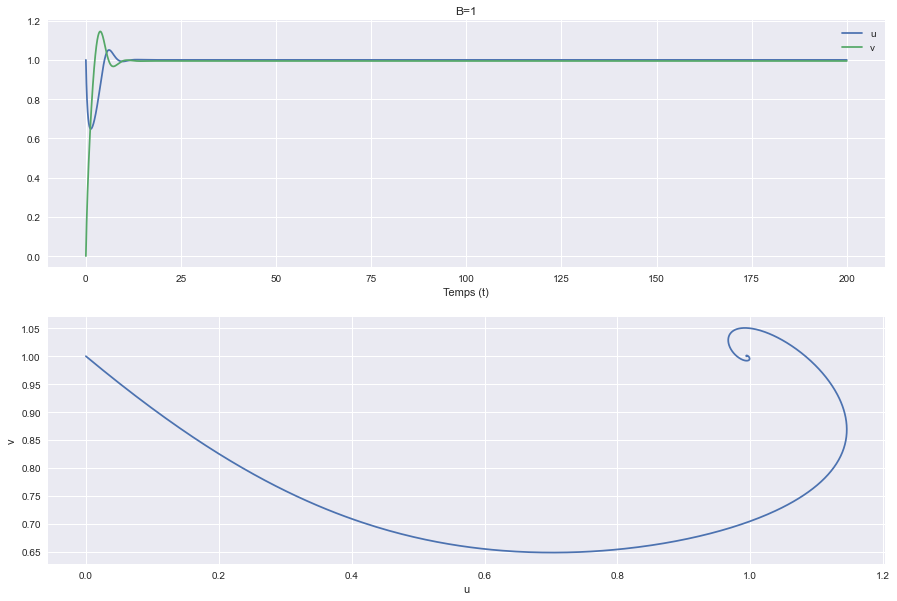

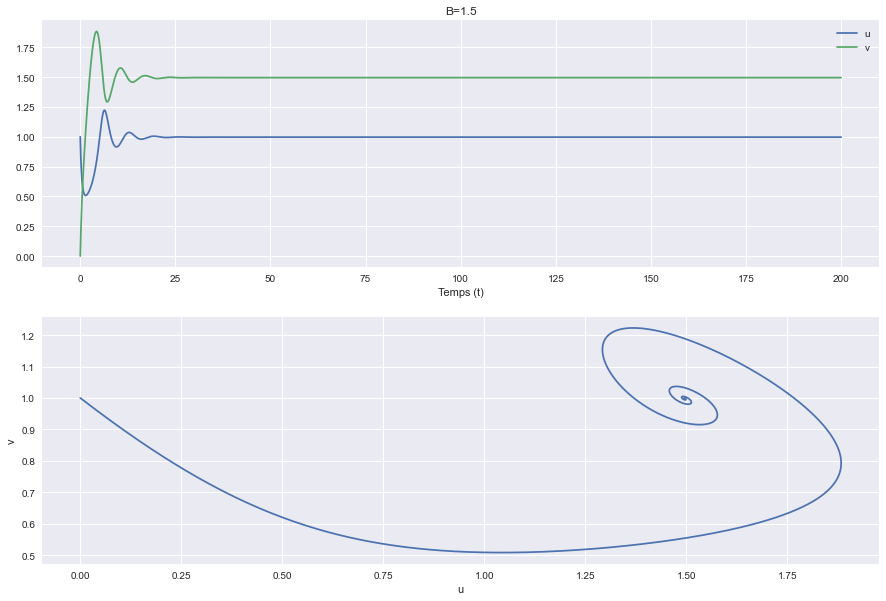

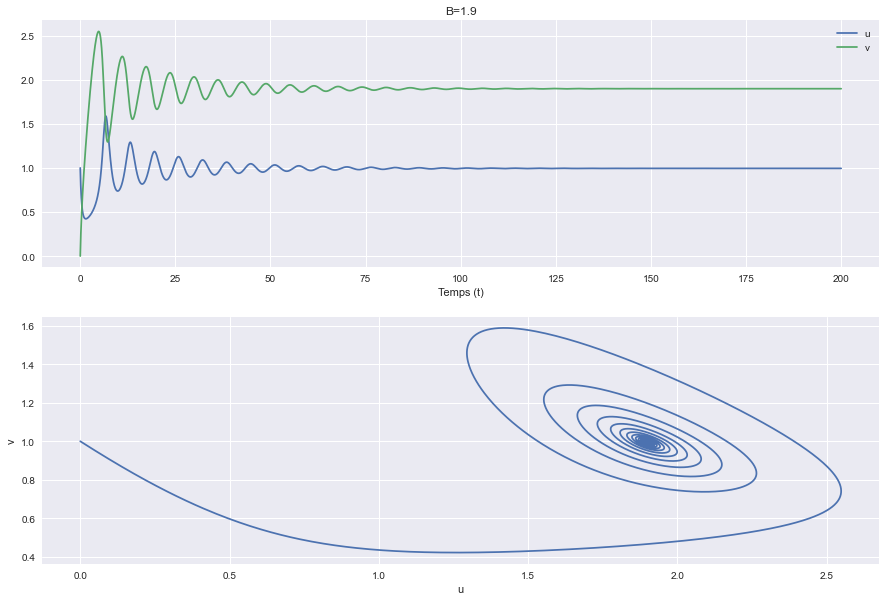

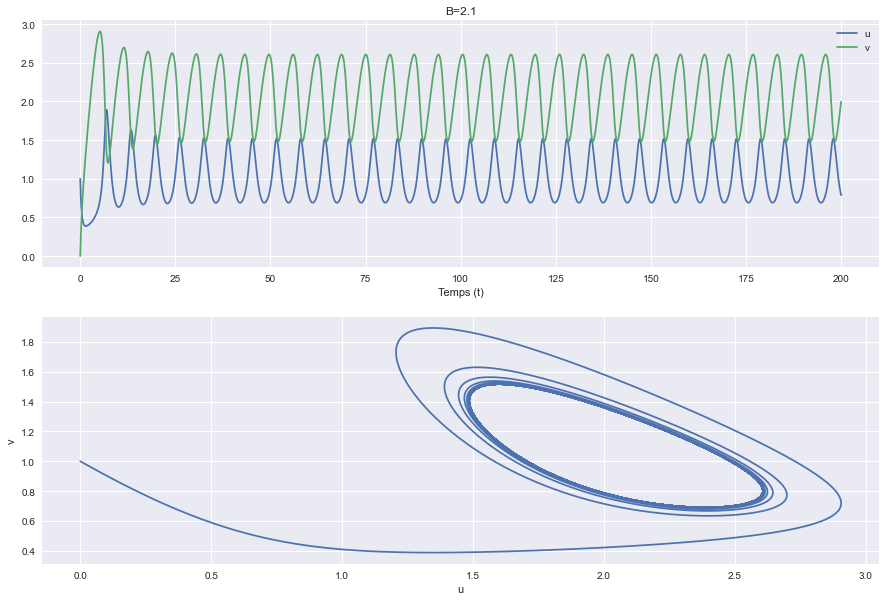

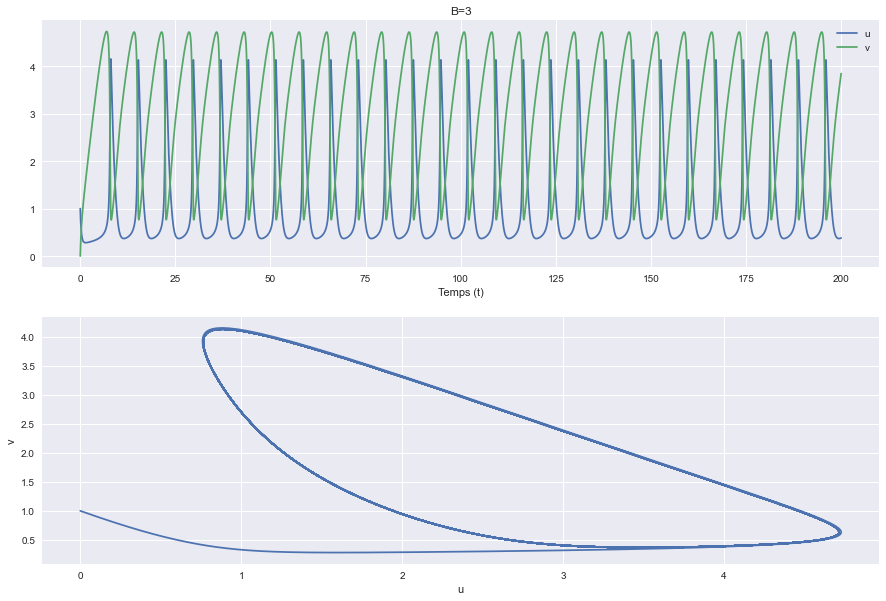

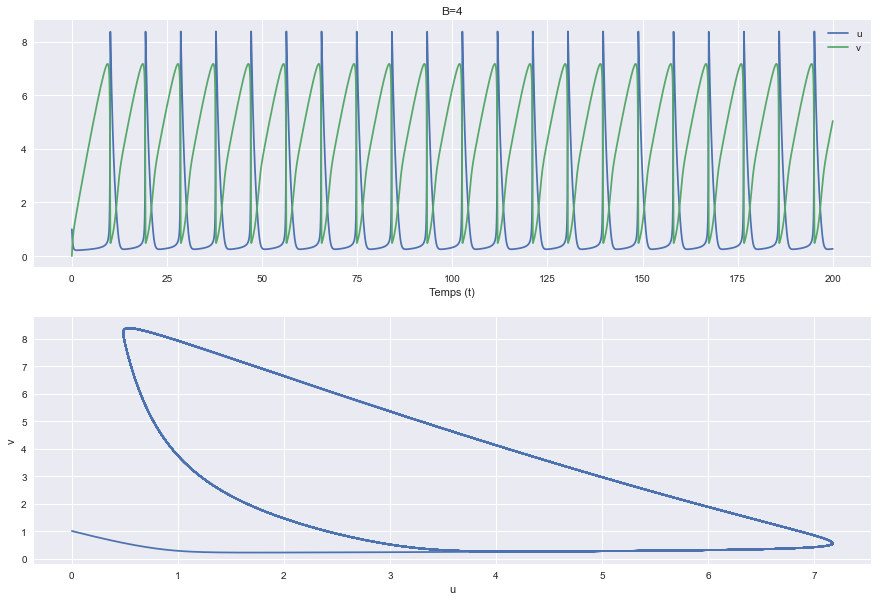

In [25]:
import numpy as np
import matplotlib.pyplot as plt

tmax=200
k=1/75
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)

u=np.zeros(N)
v=np.zeros(N)

#Conditions initiales 
u[0]=1
v[0]=0

for j in range(6):
    
    A = 1
    B = (1,1.5,1.9,2.1,3,4)

    for i in range(N-1):
        k1 = k*(A+(v[i]*u[i]**2)-B[j]*u[i]-u[i])
        k2 = k*(A+((u[i]+k1/2)**2)*(v[i]+k/2)-B[j]*(u[i]+k1/2)-(u[i]+k1/2))
        k3 = k*(A+((u[i]+k2/2)**2)*(v[i]+k/2)-B[j]*(u[i]+k2/2)-(u[i]+k2/2))
        k4 = k*(A+((u[i]+k3/2)**2)*(v[i]+k/2)-B[j]*(u[i]+k3/2)-(u[i]+k3/2))
        k1v = k*(B[j]*u[i]-v[i]*u[i]**2)
        k2v = k*(B[j]*(u[i]+k/2)-(v[i]+k1v/2)*(u[i]+k/2)**2)
        k3v = k*(B[j]*(u[i]+k/2)-(v[i]+k2v/2)*(u[i]+k/2)**2)
        k4v = k*(B[j]*(u[i]+k/2)-(v[i]+k3v/2)*(u[i]+k/2)**2)
        u[i+1] = u[i]+(1/6)*(k1+2*k2+2*k3+k4)
        v[i+1] = v[i]+(1/6)*(k1v+2*k2v+2*k3v+k4v)



    fig,ax=plt.subplots(2,figsize=(15,10))
    ax[0].plot(t,u,label = 'u' )
    ax[0].plot(t,v, label= 'v')
    ax[0].legend(loc="upper right")
    ax[0].set_title(f"B={B[j]}")
    ax[0].set_xlabel('Temps (t)')
    ax[1].plot(v,u)
    ax[1].set_xlabel('u')
    ax[1].set_ylabel('v')
    print("")
    plt.show()
    


## Le Brusselator 1D


En rajoutant un terme de diffusion spatiale, nous obtenons le modèle du Brusselator 1D :

$$
  \frac{du}{dt} = A+u^2v-Bu-u+D_{u}\nabla^{2}u
$$
$$
  \frac{dv}{dt} = Bu-u^2v+D_{v}\nabla^{2}v
$$


Nous dérivons ces équations en utilisant la méthode SBDF :


$$
  \frac{u_{i+1,j}-u_{i,j}}{k} = A+u_{i,j}^2v_{i,j}-Bu_{i,j}-u_{i,j}+D_{u}\frac{u_{i+1,j+1}-2u_{i+1,j}+u_{i+1,j-1}}{h^2}
$$
$\iff$
$$
  u_{i+1,j} = u_{i,j} + k(A+u_{i,j}^2v_{i,j}-Bu_{i,j}-u_{i,j})+\frac{D_{u}k}{h^2}(u_{i+1,j+1}-2u_{i+1,j}+u_{i+1,j-1})
$$

Avec $\lambda =\frac{D_{u}k}{h^2}$, on a :

$$
  (1+2\lambda)u_{i+1,j}-\lambda u_{i+1,j+1} -\lambda u_{i+1,j-1} = u_{i,j}(1+ku_{i,j}v_{i,j}-k(B+1))+kA  
$$ 
$\iff$
$$
  g(u_{i+1}) = u_{i}(1+ku_{i}v_{i}-k(B+1))+kA
$$
avec  
$$
g =
  \begin{bmatrix}
    1+2\lambda   & -\lambda & 0 & \dots & 0 \\
    -\lambda     & 1+2\lambda & -\lambda & \dots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \vdots \\
    0    & \dots & -\lambda & 1+2\lambda & -\lambda \\
    0    &  \dots & 0 & -\lambda & 1+2\lambda   
  \end{bmatrix}
$$
<br>
<br>
Cependant, cette matrice ne sera pas celle qui sera utilisée. En effet, il nous faut respecter les conditions aux bord de Neumann suivantes : $\frac{\partial u}{\partial x}(0,t) = \frac{\partial u}{\partial x}(L,t) = 0$ et $\frac{\partial v}{\partial x}(0,t) = \frac{\partial v}{\partial x}(L,t)$ avec $L = 50$. En d'autres termes, il faut que les 2 premières composantes de chaque vecteur $u$ doivent être égales et de même pour les 2 dernières (idem pour $v$). Pour ce faire, discrétisons les 3 premières composantes de $u^{i}$ en multipliant le vecteur $u^{i-1}$ par $g$ (ici les indices $i$ portent bien sur le vecteur et non les composantes) afin d'avoir $u_{0} = u_{1}$ : 

$$
  -\lambda u_{0} +(1+2\lambda)u_{1} -\lambda u_{2} = a u_{0} +b u_{1}+c u_{2}
$$

On pose $c = -\lambda$ pour faire disparaitre $u_{2}$ ainsi que $a = 1-\lambda$ et $b = 2\lambda$ pour aussi faire disparaitre les $\lambda$ : 

$$
  -\lambda u_{0} +(1+2\lambda)u_{1} = (1-\lambda)u_{0} + 2\lambda u_{1}
$$

Ce qui nous donne bien

$$
  u_{1}=u_{0}
$$

On répète l'opération pour $u_{i-1}$ et $u_{i}$ et la nouvelle matrice $g$ est donc :

$$
  g =
  \begin{bmatrix}
    1-\lambda   & 2\lambda & -\lambda & 0 & \dots & 0 \\
    -\lambda     & 1+2\lambda & -\lambda & 0 & \dots & 0 \\ 
    \vdots & \ddots & \ddots & \ddots & \vdots & \vdots\\
    0 & \dots & 0 & -\lambda & 1+2\lambda & -\lambda \\
    0   &  \dots & 0 & -\lambda & 2\lambda & 1-\lambda   
  \end{bmatrix}
$$
<br>

Un calcul analogue pour $v$ donne $z(u_{i+1}) = kBu_{i}+v_{i}(1-ku_{i}^{2})$, $z$ étant la même matrice que g mais avec $\lambda = \frac{D_{v}k}{h^2}$

### Observations et analyses de différents cas

Ce qui est intéressant d'observer dans le Brusselator 1D est justement cette dimension spatiale que l'on a rajoutée. Nous analyserons différents cas à différent temps en faisant varier $B$ et $D_{u}$.

#### Cas 1 ($B=1.3$ , $D_{u}=0.1$) :
<br>
Lorsque $tmax = 5$ et $tmax = 50$, on voit que les valeurs de $u$ et $v$ restent constantes pour tout $x$. Pour $tmax = 100$, on commence à observer des petites oscillations et pour $tmax = 200$ on constate que le système comprend de larges oscillations périodiques pour $u$ et de plus petites pour $v$. En d'autres termes, plus on attend, plus $u$ sera concentré autour de certains points sur la droite tandis que $v$ se répartit sur un espace plus grand ; ce qui était attendu au vu du très petit coefficient de diffusion $D_{u}$.
<br>

#### Cas 2 ($B=1.3$ , $D_{u}=10$) :
<br>
Ce cas-ci est plus simple : excepté au tout début de la réaction où l'on observe une petite asymétrie, on note une répartition homogène des concentrations dans l'espace pour $tmax = 50,100,200$,etc... Ceci est expliqué par le fait que $B$ est suffisament petit pour que $u$ et $v$ se stabilisent autour d'une constante comme vu dans le cas du Brusselator 0D, et par le fait que les coefficients de diffusion $D_{u}$ et $D_{v}$ sont très grands. Ainsi, les concentrations $u$ et $v$ se diffusent très vite et atteignent un état d'équilibre.
<br>

#### Cas 3 ($B=3$ , $D_{u}=10$) :
<br>
Le cas 3 semble en apparence similaire au précédent, mais présente tout de même une différence notable : à $tmax = 5$ et $200$, $u$ est plus grand que $v$ alors que l'inverse est vrai pour $tmax = 50$ et $100$. Le changement s'opère $49.7$ et $101.14$ respectivement, et cela peut s'expliquer par la grande valeur de $B$. En effet, puisque $B$ est supérieur à 2, les concentrations ne se stabilisent jamais et $u$ va périodiquement prendre le dessus sur $v$ et vice-versa. Plus le coefficient de diffusion $D_{u}$ sera grand, plus l'intervalle de temps entre les "échanges" sera grand.




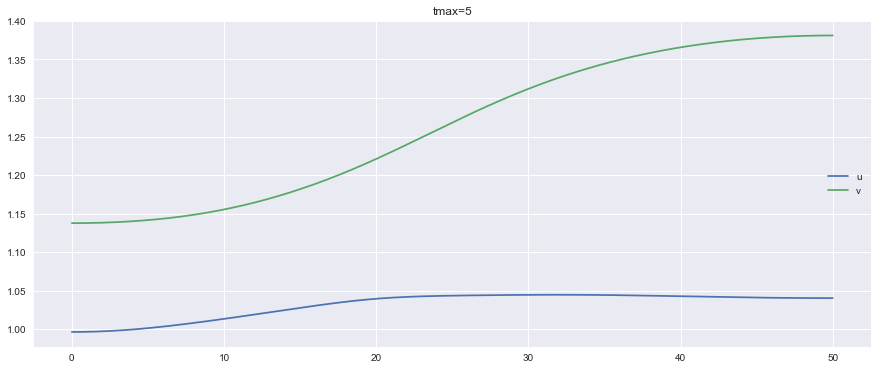

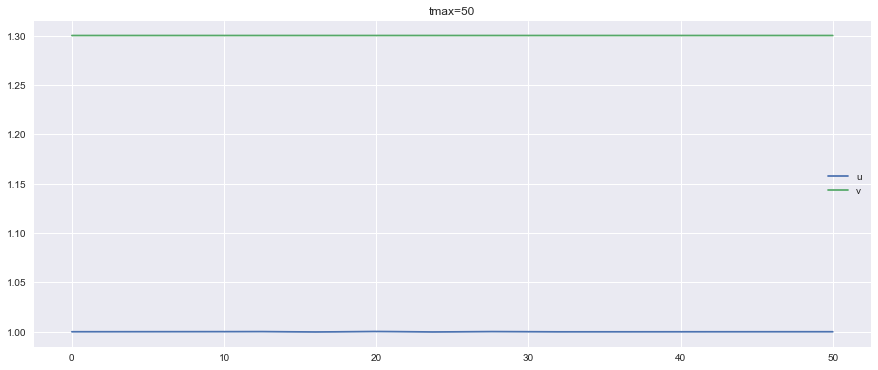

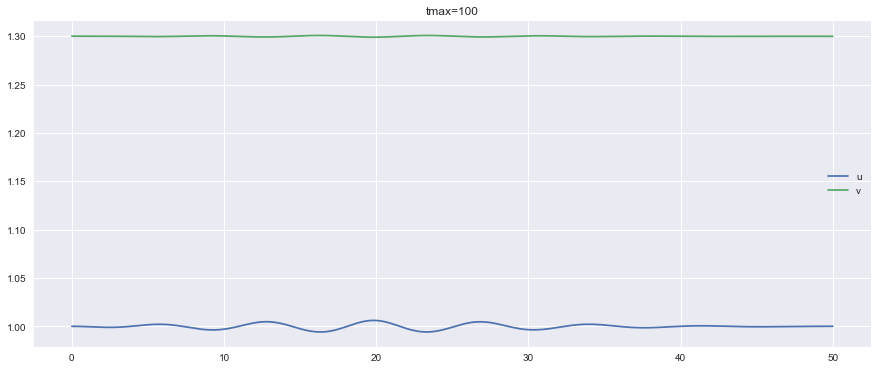

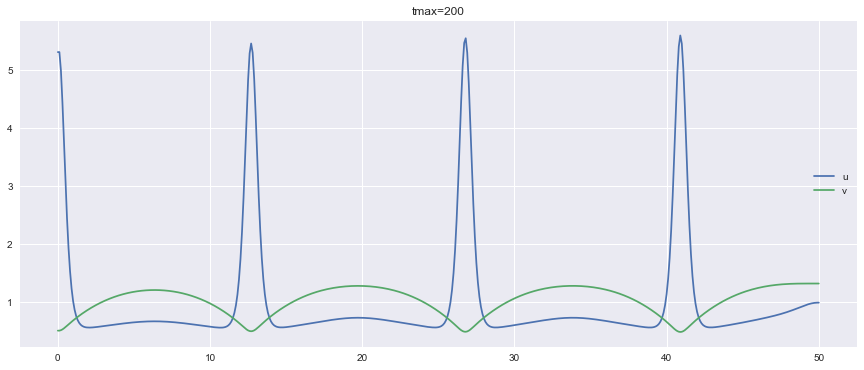

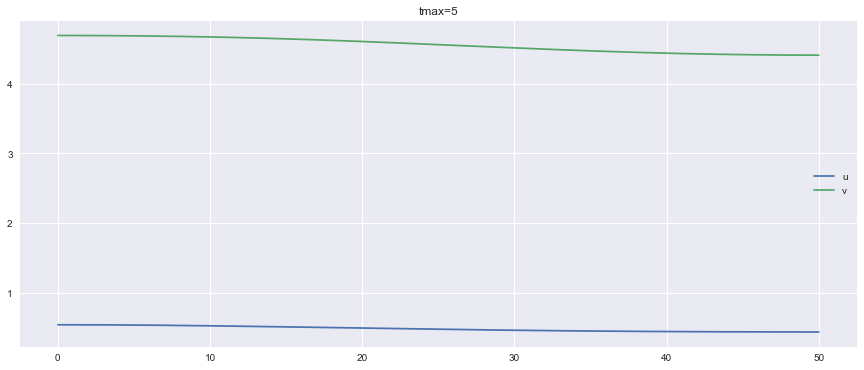

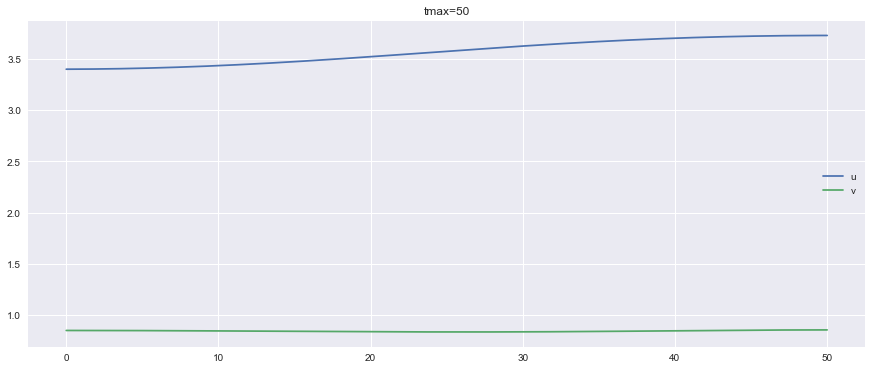

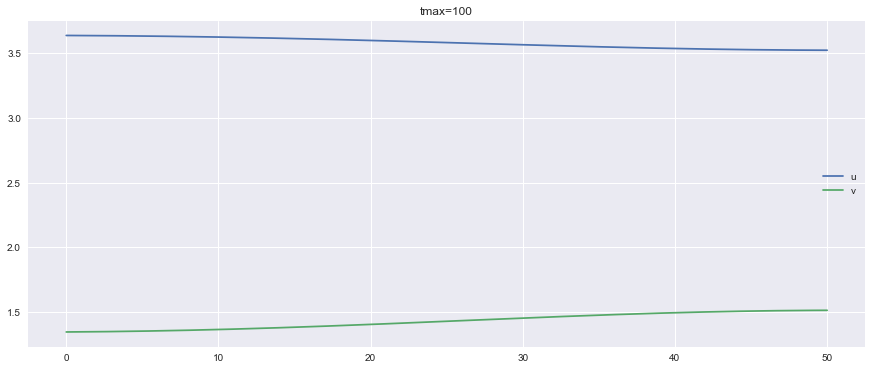

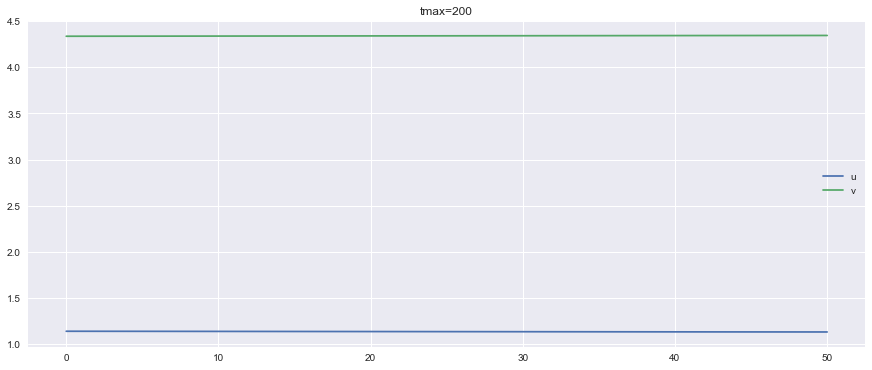

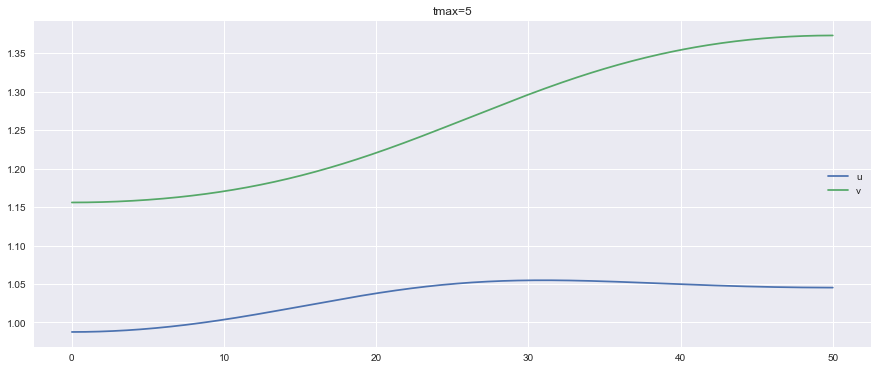

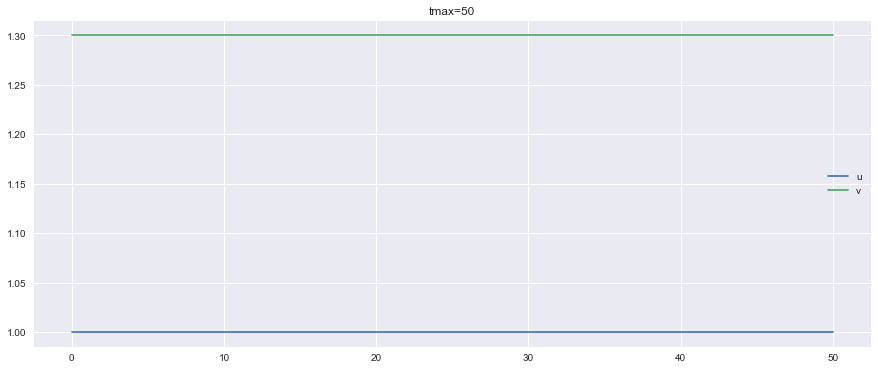

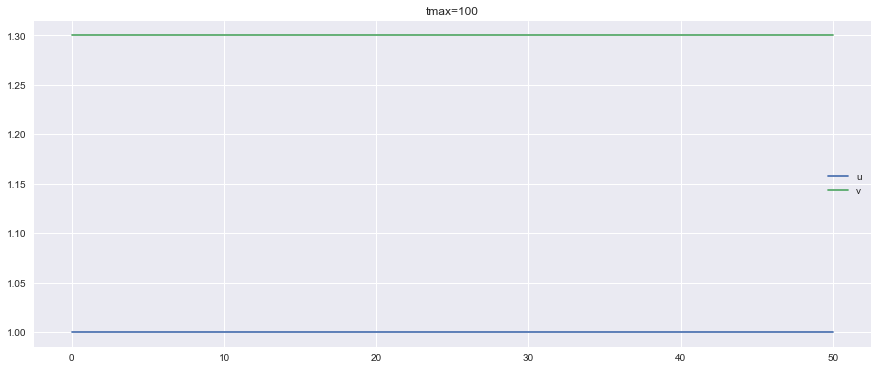

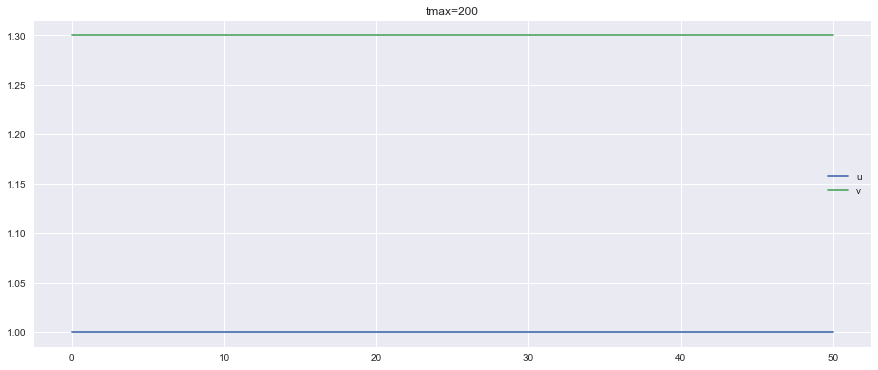

In [26]:
import numpy as np
import matplotlib.pyplot as plt

L=50
k=1/75
h = 1/10

N=int(np.floor(L/h))+1
x=np.linspace(0,L,N)


for i in range(3):

    A = 1*np.ones(N)
    B = np.array([1.3*np.ones(N), 3*np.ones(N), 1.3*np.ones(N)])
    Du = (0.1,10,10)
    Dv = 10

    a = (2*Du[i]*k/h**2)*np.ones(N)
    b = (-Du[i]*k/h**2)*np.ones(N)
    c = (-Du[i]*k/h**2)*np.ones(N)
    d = (2*Dv*k/h**2)*np.ones(N)
    e = (-Dv*k/h**2)*np.ones(N)
    f = (-Dv*k/h**2)*np.ones(N)


    #Matrice
    g = np.diagflat(b[1:],-1)+np.diagflat(c[:-1],1)+np.diagflat(1+a)
    z = np.diagflat(e[1:],-1)+np.diagflat(f[:-1],1)+np.diagflat(1+d)

    #Changement de la 1ère et dernière ligne
    g[0] = np.array([1+b[0], a[0], c[0]] + [0 for p in range(N-3)])
    g[-1] = np.array([0 for p in range(N-3)] + [b[0], a[0], 1+c[0]])

    z[0] = np.array([1+e[0], d[0], f[0]] + [0 for p in range(N-3)])
    z[-1] = np.array([0 for p in range(N-3)] + [e[0], d[0], 1+f[0]])

    #Inversion
    G = np.linalg.inv(g)
    Z = np.linalg.inv(z)
    
    for q in range(4):
        u=[]
        v=[]

        u.append(np.cos(x * np.pi / L + np.pi) + 1)
        v.append(np.cos(x * np.pi / L) + 1)
        
        tmax = (5,50,100,200)
        M=int(np.floor(tmax[q]/k))+1

    
        for j in range(M-1):

            u.append(G@(k*A + u[j]*(1+k*u[j]*v[j]-k*(B[i]+1))))
            v.append(Z@(k*B[i]*u[j]+v[j]*(1-k*u[j]*u[j])))   



        fig,ax=plt.subplots(figsize=(15,6))

        ax.plot(x,u[-1], label = "u")
        ax.plot(x,v[-1], label = "v") 
        ax.legend(loc="center right")
        ax.set_title('tmax=%i' %tmax[q])
        print("")
        plt.show()


# Vagues scélérates et l'équation non-linéaire de Schrödinger
Nous voulons avec ce projet, obtenier une approximation des ondes scélérates. Celles-ci pouvant être obtenues avec l'amplitude de l'équation de Schrödinger non-linéaire, qui correspond à une fonction d'onde complexe $\psi$(x,t):

$$i\frac{\partial \psi}{\partial t}= -\frac{1}{2}\frac{\partial ^2\psi}{\partial x^2}+ K|\psi|^2\psi$$

Ou $K$ est un paramètre. Le comportement de cette fonction est assez particulier et sera expliqué de suite:

## Partie 1
Nous voulons résoudre l'équation au dessus, avec la condition initiale suivante:

$$\psi (x,0) = 0.5 + 0.01\cos \bigg(\frac{2\pi x}{40}\bigg)$$

Nous irons aussi faire varier le paramètre $K$ de $-1$ à $+1$. Pour ce faire, nous séparer l'équation suivante en un opérateur linéaire et en un non-linéaire (ceci est la méthode Fourier pseudo-spectrale):
$$\begin{split}\frac{\partial \psi}{\partial t} & = \frac{i}{2}\frac{\partial^2\psi}{\partial x^2}- iK|\psi|^2\psi \\
& = \mathscr{L} \psi + \mathscr{N} \psi \end{split}$$
Avec la partie linéaire:
$$\mathscr{L}\psi = \frac{i}{2}\frac{\partial^2\psi}{\partial x^2}$$
et la partie non-linéaire:
$$\mathscr{N} \psi = - iK|\psi|^2\psi $$
Avec l'équation compléte ayant la forme formelle de:

$$\psi (x, t) = \exp^{t(\mathscr{L}+\mathscr{N})}\psi (x, 0)$$

Si nous considérons des petits avancements dans le temps $\Delta t$, nous trouvons une approximation grâce à la formule Baker-Hausdorff:

$$\psi (x, t+\Delta t) = \exp^{\Delta t(\mathscr{L}+\mathscr{N})}\psi (x, t) \approx \exp^{\Delta t\mathscr{L}}\exp^{\Delta t\mathscr{N}}\psi (x, t)$$

Nous pouvons alors avec la transformation de Fourier discréte $\mathscr{F}$ et son inverse $\mathscr{F}^{-1}$:

$$\psi (x, t+\Delta t) = \mathscr{F}^{-1}\Bigg[ \exp^{\frac{-i}{2}\big( \frac{2\pi k}{L}\big)^2\Delta t}\mathscr{F}\Big[ \exp^{-iK|\psi (x,t)|^2\Delta t}\psi (x, t)\Big] \Bigg]$$

Algorithement, la chaîne d'opérations pour la fonction est la suivante:\
\
$1$) Avec $\psi (x, t)$, avance la partie non-linéaire avec $\Delta t$, avec l'update partial

$$g(x, t; \Delta t) = \exp^{-iK|\psi|^2\Delta t}\psi (x, t)$$

$2$) Calculer la transfromation de Fourier de l'update partial

$$\hat{g}_m(t; \Delta t) = \mathscr{F}\big[g(x,t; \Delta t)\big]$$

$3$) Avancer la partie linéaire par $\Delta t$ et calculer la solution complétement mise à jour dans l'espace spectral

$$\hat{\psi}_m(t + \Delta t)=\exp^{\frac{-i}{2}\big( \frac{2\pi k}{L}\big)^2\Delta t}\hat{g}_m(x,t)$$

$4$) Calculer la transformation de Fourier inverse, obtenant la solution mise à jour dans l'espace physique

$$\psi (x, t+\Delta t) = \mathscr{F}^{-1}\big[ \hat{\psi}_m(t+\Delta t)\big]$$

Et puis répéter le cycle dès l'étape $1$ pour le prochain avancement $\Delta t$:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from copy import copy as copy

In [28]:
def schrodinger(K, a, Ti = 0, T = 200, N = 1024, L = 40, dt = 0.01):
    temps = np.arange(0, T, dt)
    x = np.linspace(-L/2 + L/N, L/2, N+1)
    m = np.linspace(-N/2, N/2, N+1)
    p = np.zeros((len(x), len(temps)), dtype="complex")
    p[:,0] = 0.5 + 0.01*np.cos(2*np.pi*x/L)

    for i, t in enumerate(temps[:-1]):
        g = np.exp(-1j*K*dt*np.abs(p[:, i])**2)*p[:, i]
        g_m = (1/N)*np.fft.fftshift(np.fft.fft(g))
        p_m = np.exp(dt*(-1j/2)*(2*m*np.pi/L)**2)*g_m
        p[:, i+1] = N*np.fft.ifft(np.fft.ifftshift(p_m))

    if a == 0:
        u, v = np.meshgrid(x, temps)
        c = np.linspace(np.min(np.min(np.abs(p))), np.max(np.max(np.abs(p))), 101)
        plt.contourf(u, v, np.abs(np.transpose(p)), c, cmap = 'jet')

        plt.xlabel('x')
        plt.ylabel('t')
        plt.title("amplitude de psi(x, t) pour K = {}".format(K))
        plt.colorbar()
        plt.show()
        
    if a == 1:
        fig, ax =plt.subplots()
        fig.suptitle("Graphes de l'amplitude de psi(x,t), à des intervalles de temps, avec K = {}".format(K))
        ax.plot(x, np.abs(p[:, int(0/dt)]), c ='k', label = "Amplitude au temps 0")
        ax.plot(x, np.abs(p[:, int(25/dt)]), c ='m', label = "Amplitude au temps 25")
        ax.plot(x, np.abs(p[:, int(50/dt)]), c ='y', label = "Amplitude au temps 50")
        ax.plot(x, np.abs(p[:, int(75/dt)]), c ='g', label = "Amplitude au temps 75")
        ax.plot(x, np.abs(p[:, int(100/dt)]), c ='b', label = "Amplitude au temps 100")
        plt.legend(['t = 0', 't = 25', 't = 50', 't = 75', 't = 100'], loc ='upper left')
        plt.xlabel('x')
        plt.ylabel('amplitude de psi(x,t)')
        
    if a ==2:
        plt.title("Graphe de l'amplitude de psi(x,{}) avec K = -1".format(Ti))
        plt.plot(x, np.abs(p[:, int(Ti/dt)]), c ='k', label = "Amplitude au temps {}".format(Ti))
        plt.xlabel('x')
        plt.ylabel('aplitude de psi(x, {})'.format(Ti))

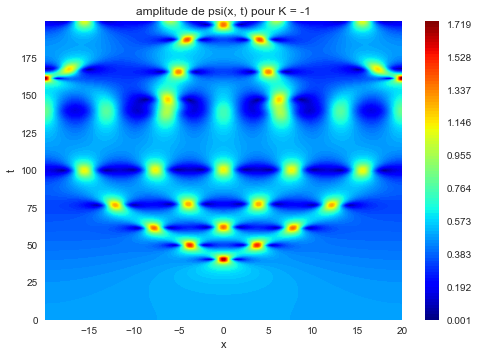

In [29]:
schrodinger(-1, 0)

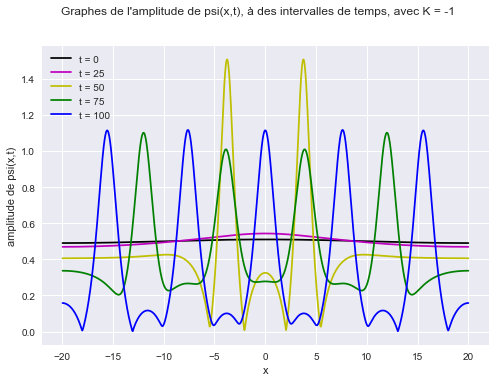

In [4]:
schrodinger(-1, 1)

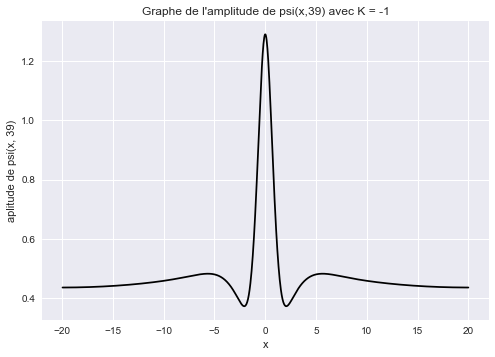

In [5]:
schrodinger(-1, 2, 39)

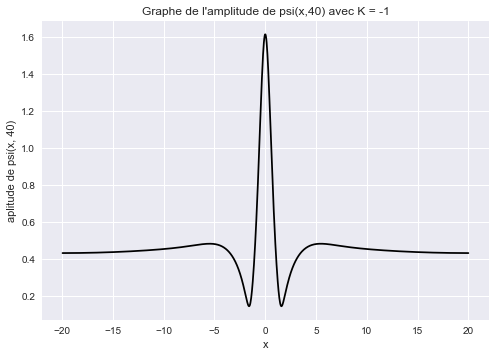

In [6]:
schrodinger(-1, 2, 40)

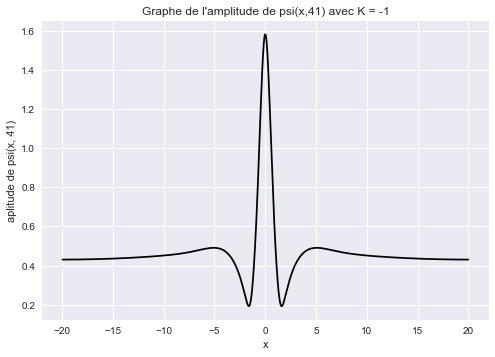

In [7]:
schrodinger(-1, 2, 41)

Nous constatons qu'initialement, l'amplitude $\psi(x,t)$ est très faible et varie symétriquement le long de l'axe des $x$. Cependant aux alentours de $t = 40$, nous obtenons un maximum pour $x = 0$, comme nous le voyons dans le troisième graphe. Ensuite, ce pic disparait assez rapidement, seulement pour plus tard, aux alentours de $t = 50$, réapparaître en deux maxima symétriques par rapport à $x = 0$. Et ainsi de suite, nous observons une propagation des maxima, montré au deuxième graphe.

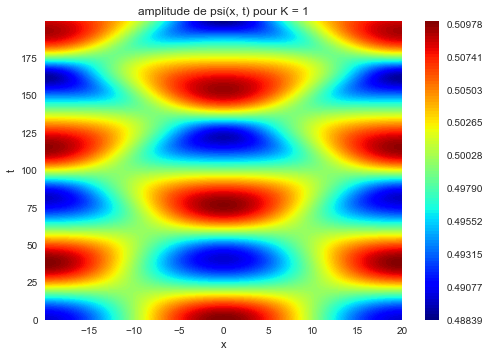

In [8]:
schrodinger(1, 0)

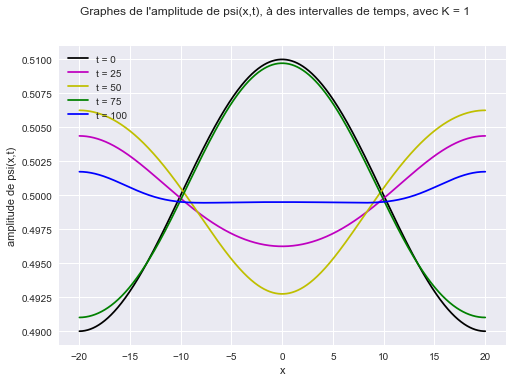

In [9]:
schrodinger(1, 1)

Il est évident qu'ici, il s'agit d'un comportement assez régulier, à une amplitude plus faible que dans la cas précédent. 

Dans le cas ou $K < 0$, nous avons pu observer des pics à amplitude forte très concentrés en des points précis, symétriques par rapport à $x = 0$. Nous comprenons pourquoi il a l'appellation de cas 'focusing'.

Dans le cas ou $K > 0$, nous avons pu cependant observer qu'il n'ya pas de pics localisés mais qu'il s'agit d'un comportement assez global et très régulier. Ceci comme dans le cas au dessus est symétrique par rapport à $x = 0$, d'ou le nom 'defocusing case'.

## Partie 2
Dans cette partie, nous allons calculer une solution analytique de l'équation non-linéaire de Schrödinger. Celui-ci est appellé le 'Peregrine breather' et est considéré comme un model fondamental des vagues scélérates, avec un domaine non-borné, $x\in (-\infty, +\infty)$ avec $K=-1$:

$$\psi(x,t)=\Big[ 1-\frac{4(1+2it)}{1+4x^2+4t^2}\Big] \exp^{it}$$
\
Afin de pouvoir le calculer nous allons, dans un premier temps le faire sur un domaine $L=6$ et progressivement augmenter $L$ pour trouver de mieux en mieux des bonnes approximations du 'Peregrine breather'. Il faudra aussi choisir un temps et position de départ afin de montrer les phases de amplification et destruction de l'onde. \
Il nous est donné d'avantage, que l'amplitude maximum est achevée en $t=0$ et $x=0$.

In [30]:
def peregrine(L, K = -1, T = 10, N = 1024, dt = 0.01):
    temps = np.arange(-T, T+dt, dt)
    x = np.linspace(-L/2 + L/N, L/2, N+1)
    m = np.linspace(-N/2, N/2, N+1)
    p = np.zeros((len(x), len(temps)), dtype = "complex")
    p2 = copy(p)
    p[:, 0] = np.exp(1j*temps[0])*(1-(4*(1+2j*temps[0]))/(1+4*x**2+4*temps[0]**2))
    p2[:, 0] = copy(p[:, 0])
    
    for i, t in enumerate(temps[:-1]):
        g = np.exp(-1j*K*dt*np.abs(p[:, i])**2)*p[:, i]
        g_m = (1/N)*np.fft.fftshift(np.fft.fft(g))
        p_m = np.exp(dt*(-1j/2)*(2*m*np.pi/L)**2)*g_m
        p[:, i+1] = N*np.fft.ifft(np.fft.ifftshift(p_m))
        p2[:, i+1] = np.exp(1j*t)*(1-(4*(1+2j*t))/(1+4*x**2+4*t**2))
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
    fig.suptitle('Comparaison entre Peregrine exacte et simulée')
    plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)
        
    u, v = np.meshgrid(x, temps)
    c1 = np.linspace(np.min(np.min(np.abs(p))),np.max(np.max(np.abs(p))),101)
    c2 = np.linspace(np.min(np.min(np.abs(p2))),np.max(np.max(np.abs(p2))),101)
    a1 = ax1.contourf(u, v, np.abs(np.transpose(p)), c1, cmap = 'jet')
    a2 = ax2.contourf(u, v, np.abs(np.transpose(p2)), c2, cmap = 'jet')
    ax1.set(xlabel = "x", ylabel = "t")
    ax2.set(xlabel = "x", ylabel = "t")
    ax1.set_title("Solution simulée")
    ax2.set_title("Solution exacte")

    fig.colorbar(a1, ax=ax1)
    fig.colorbar(a2, ax=ax2)
    plt.show()
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
        
    ax1.plot(x, np.abs(p2[:, int(T/dt)] - p[:, int(T/dt)]))
    ax1.set_title("Différence temporelle entre simulations (log)")
    ax2.plot(temps, np.abs(p2[int(N/2) -1 , :] - p[int(N/2) -1, :]))
    ax2.set_title("Différence spatialle entre simulations (log)")
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax1.set(xlabel = "x")
    ax2.set(xlabel = "t")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
    
    ax1.plot(x, np.abs(p[:, int(T/dt)]), label = "simulée")
    ax1.plot(x, np.abs(p2[:, int(T/dt)]), label = "théorique")
    ax1.set_title("solutions simulée et théorique")
    ax1.legend()
    ax1.set(xlabel = "x", ylabel = "amplitude")
    
    ax2.plot(temps, np.abs(p[int(N/2) , :]), label = "simulée")
    ax2.plot(temps, np.abs(p2[int(N/2) , :]), label = "théorique")
    ax2.set_title("solutions simulée et théorique")
    ax2.legend()
    ax2.set(xlabel = "t", ylabel = "amplitude")
        

Nous avons, dans un premier temps fait deux calculs: un pour une solution simulée (graphe de gauche) qui suit la même démarche vu dans la partie $1$ et une (graphe de droite) qui prend uniquement en compte la condition initale qui nous est donnée. 

Nous avons ensuite, des graphes logarithmiques qui nous montrent les différences exactes entre graphes d'un point de vue temporel et puis spatial. 

Finalement, nous avons des graphes qui nous montrent les graphes superposés et ne dépendant que d'un premier temps de la position et ensuite du temps.

Nous irons progressivement augmenter la variable $L$, afin d'obtenir de meilleurs résultats.

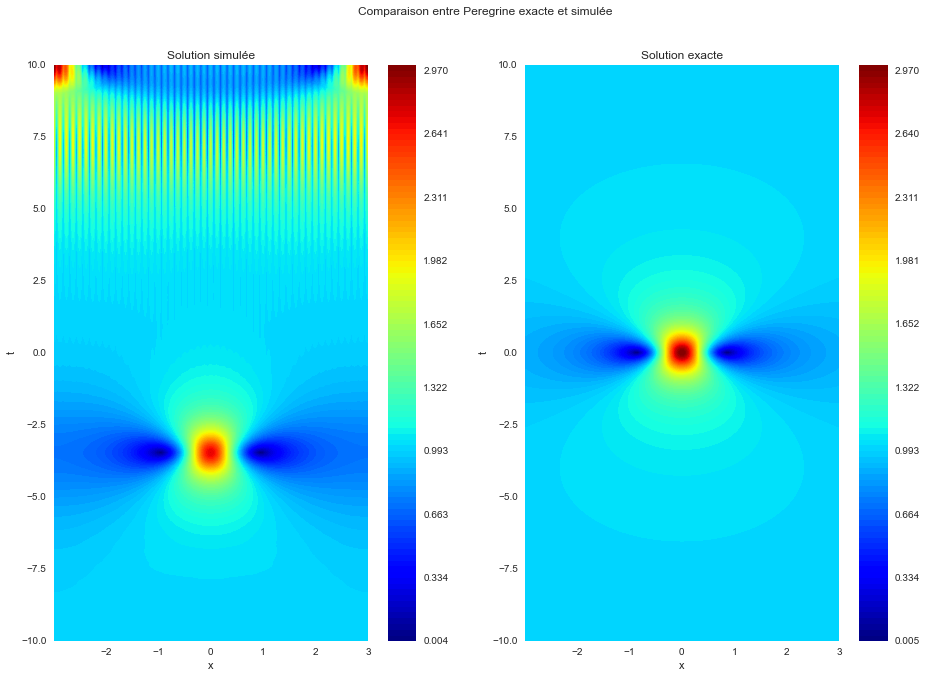

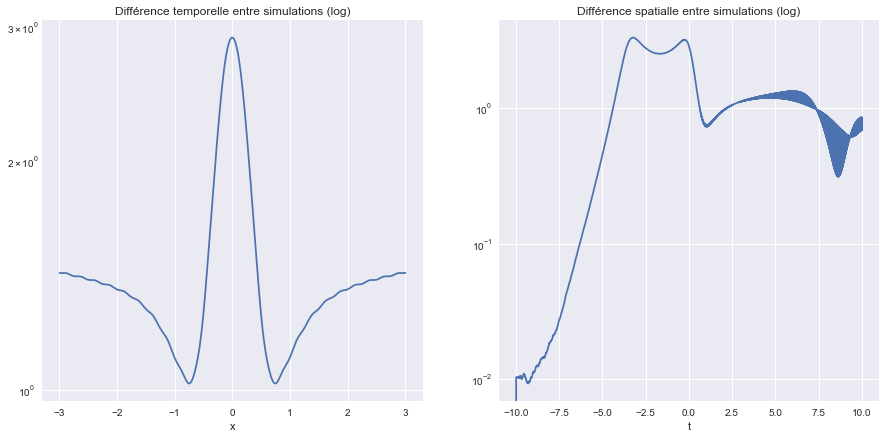

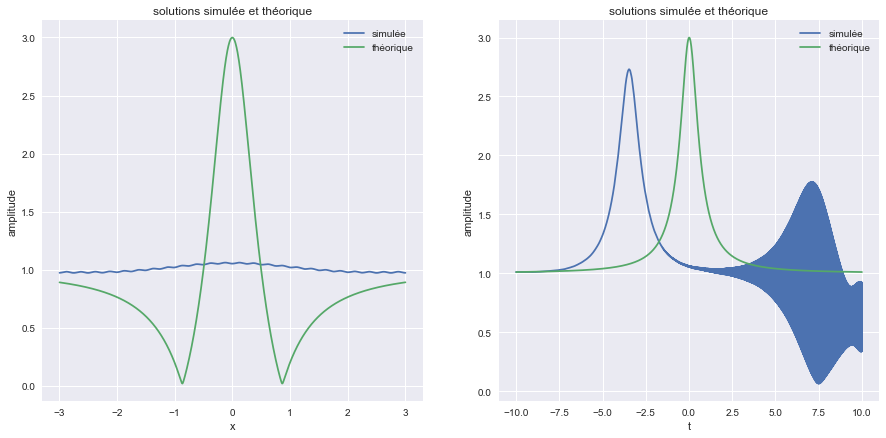

In [31]:
peregrine(6)

Nous remarquons que pour un petit domaine ($L=6$), le maximum est décalé dans la solution simulée: Il ne strouve pas en $t=0$, comme dans la solution exacte. De plus nous observons des effets de bord dans la solution simulée qui sont absents dans l'exacte. Cependant, nous observons que l'exacte est fort instable lorsque $x$ croît.

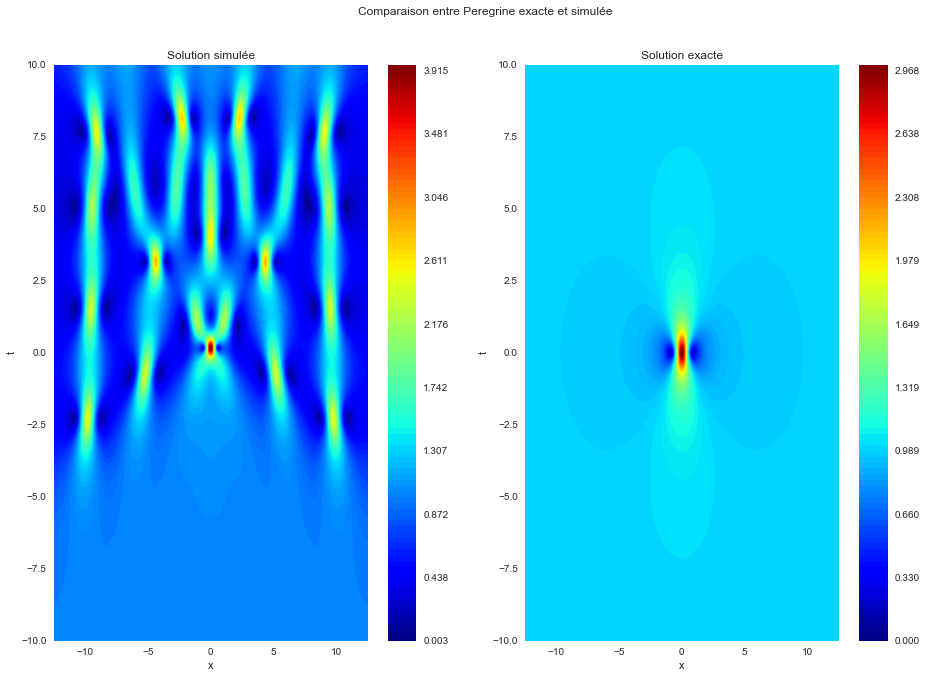

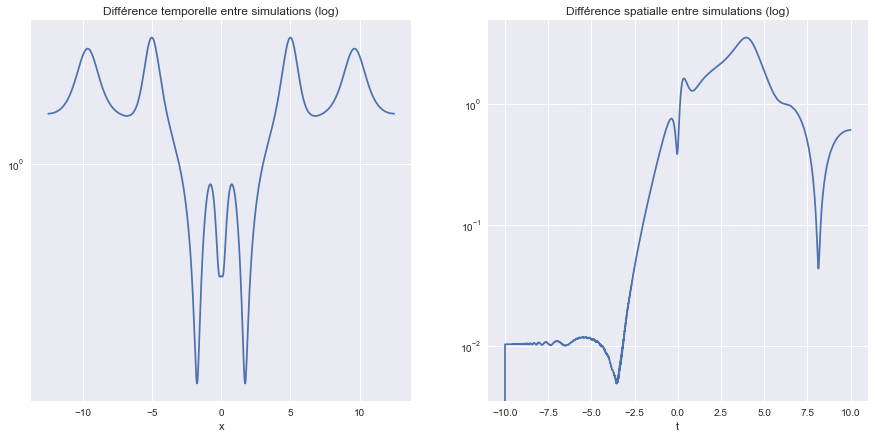

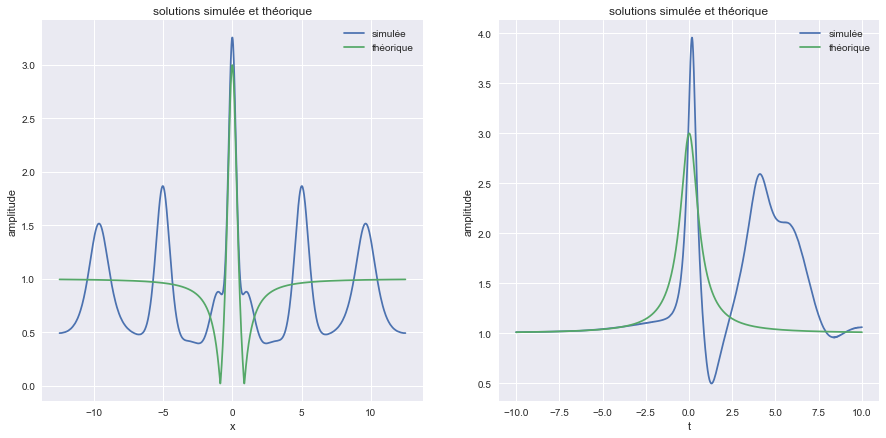

In [32]:
peregrine(25)

Dans ce domaine ($L= 25$), nous voyons (dans le dernier graphe) que les solutions se raprochent plus. Cependant, or le maximum se trouve au même endroit que dans l'exacte, nous observons qu'il y a des maxima qui se forment aux alentours de ce maximum central. 

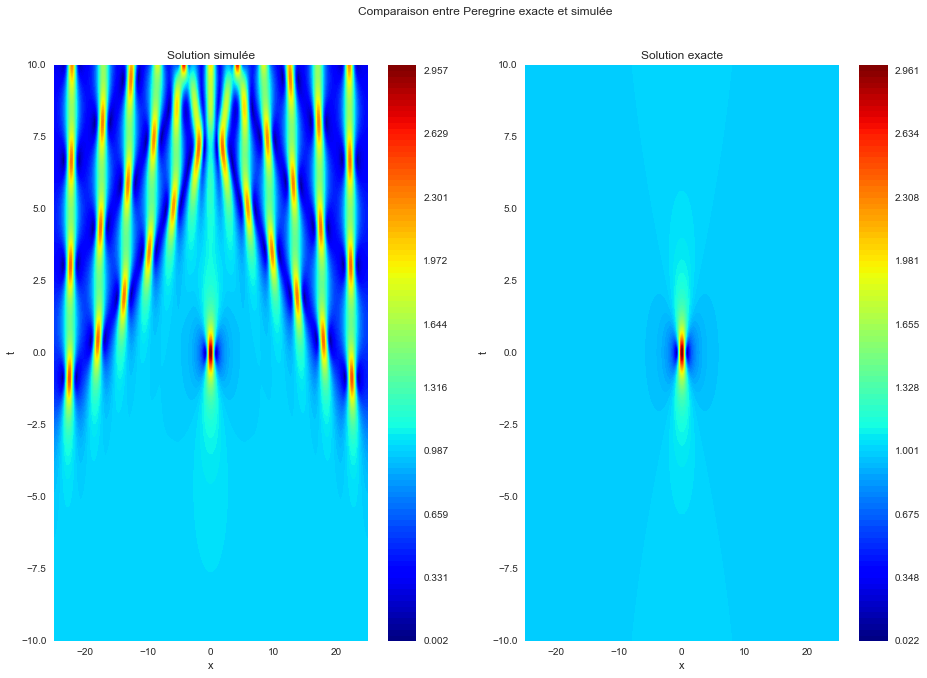

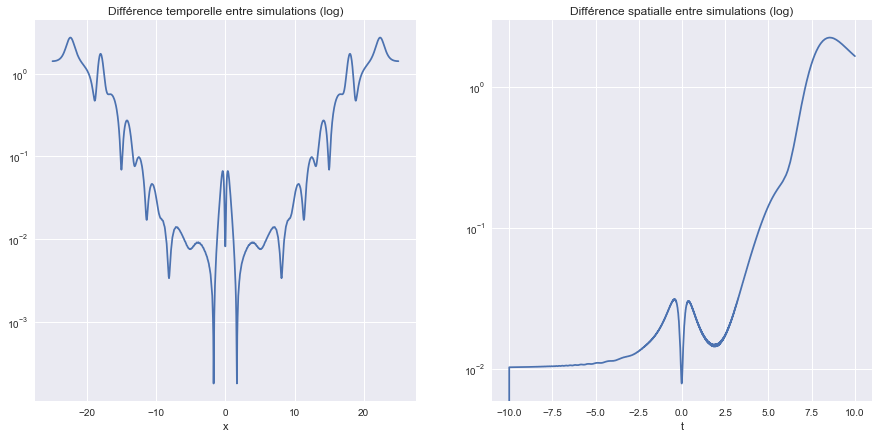

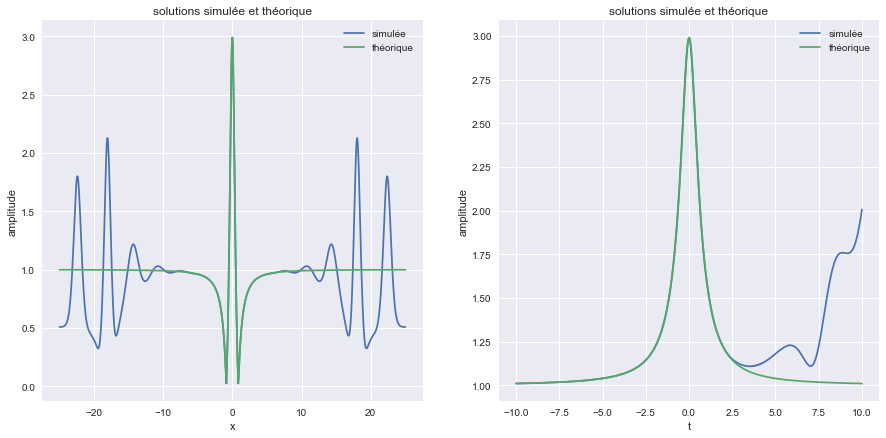

In [33]:
peregrine(50)

Dans ce domaine ($L=50$), nous pouvons observer (dans les graphes du bas) que les solutions se ressemblent beaucoup plus maintenant, au moins autour du maximum, qui est au même endroit que dans la exacte. Nous observons également que l'instabilité trouvée dans les graphes précédents est en train de disparaître, même si elle est encore assez présente aux bords.

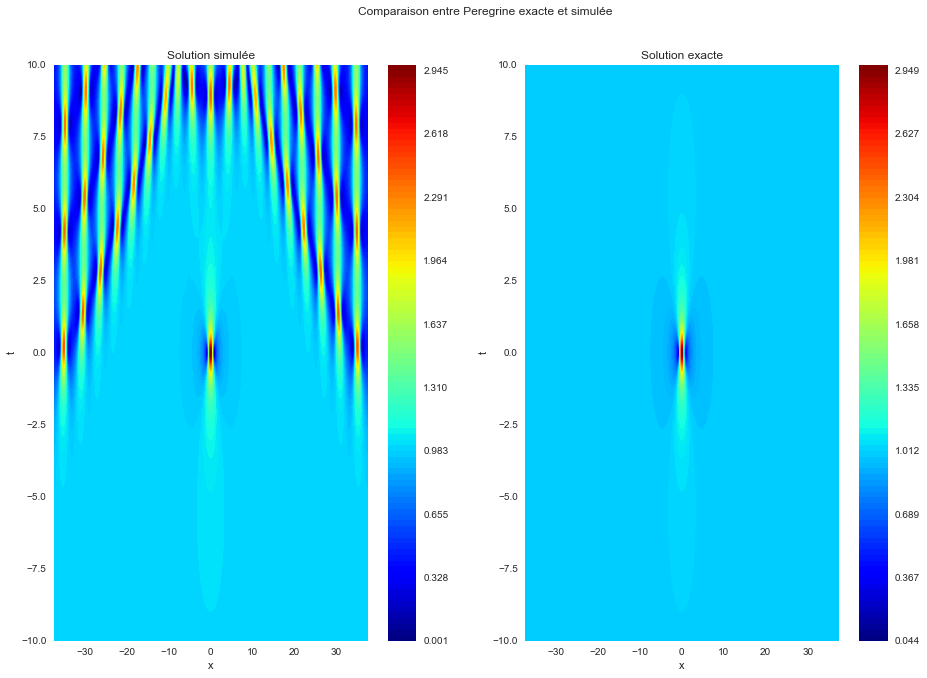

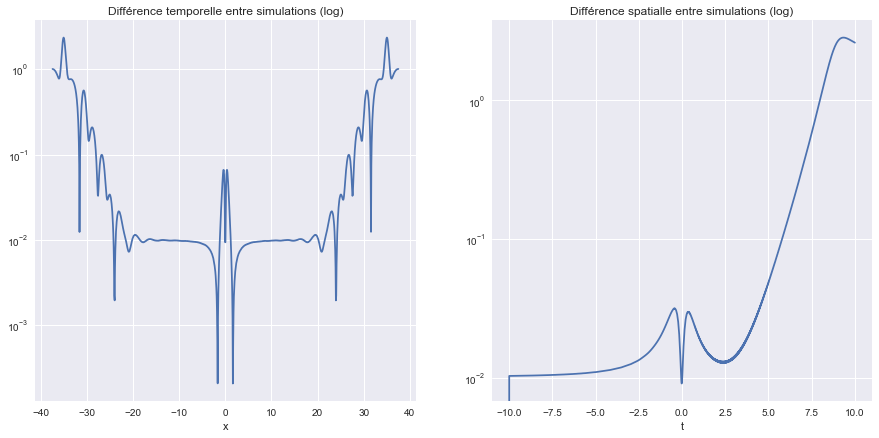

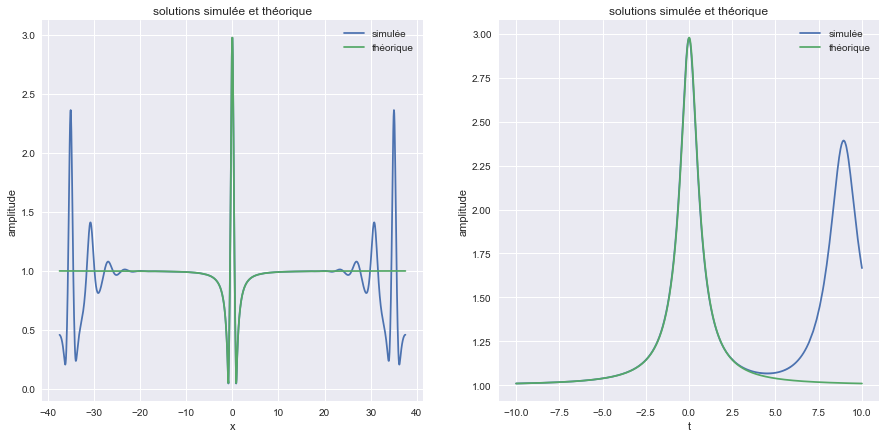

In [34]:
peregrine(75)

Dans ce domaine ($L=75$), nous constatons tout de même, les même choses que dans le domaine précédent mais plus précises, malgré le fait que les maxima aux bords semblent avoir devenu plus grands.

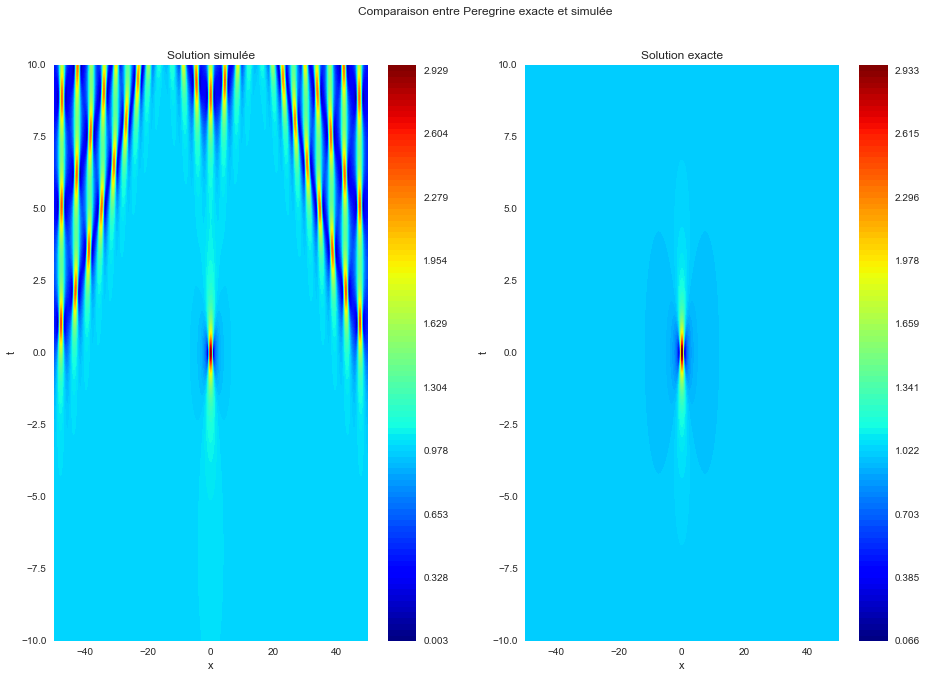

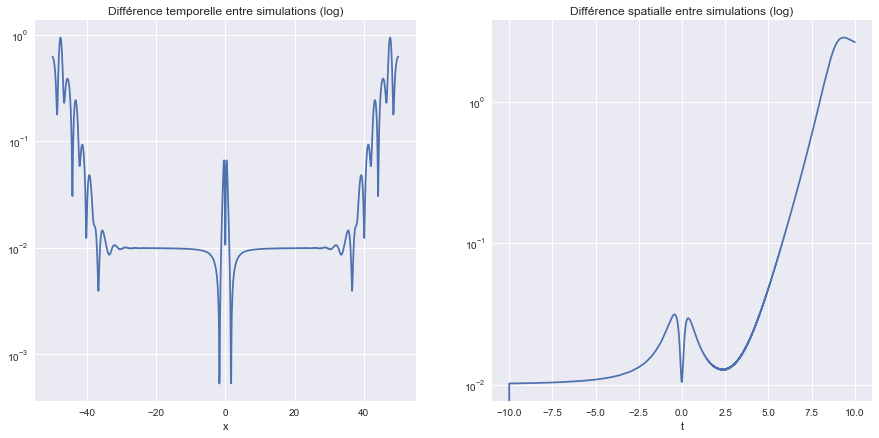

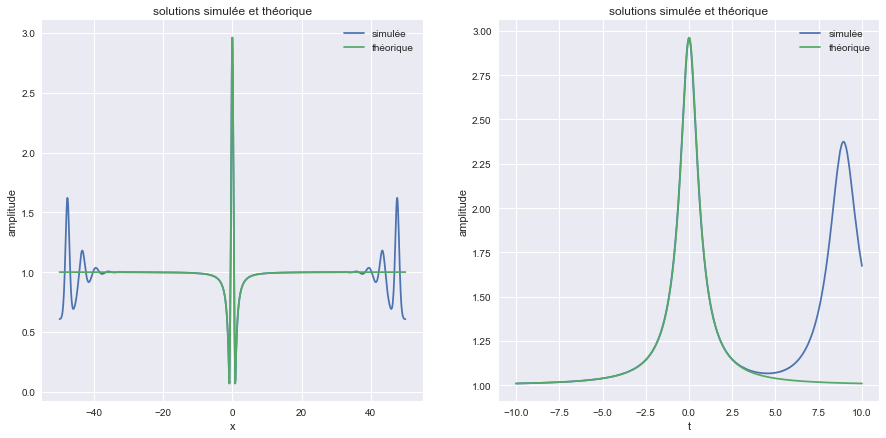

In [35]:
peregrine(100)

Dans ce domaine ($L=100$), nous constatons que les conditions sont tout de même semblables à celles du domaine précédent. Cependant, Il est évident que les effets de bords perdent leurs intensité et que la solution simulée commence à se ressembler fort à la solution exacte.

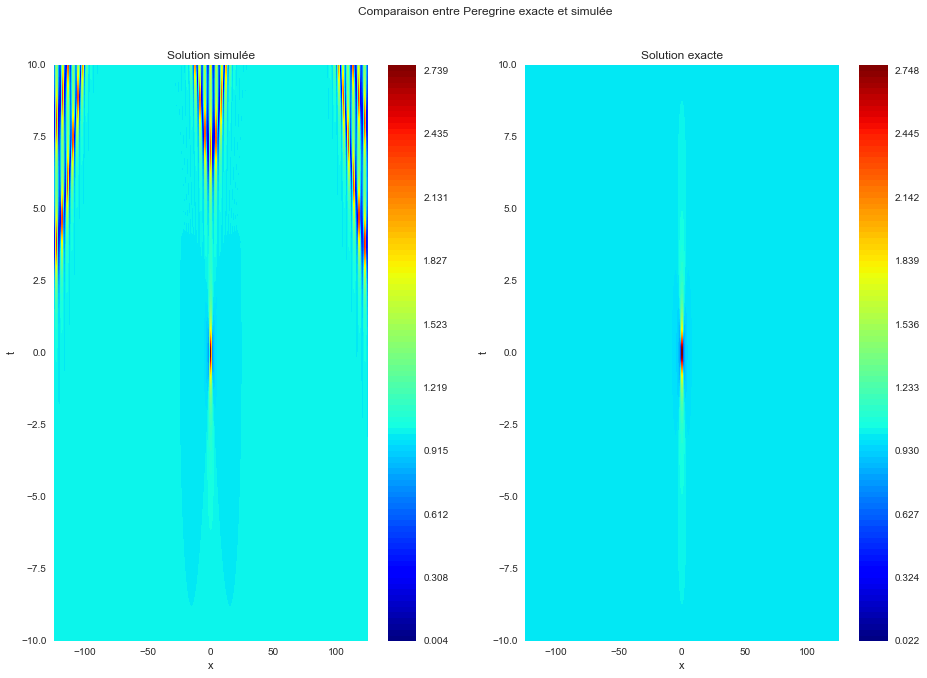

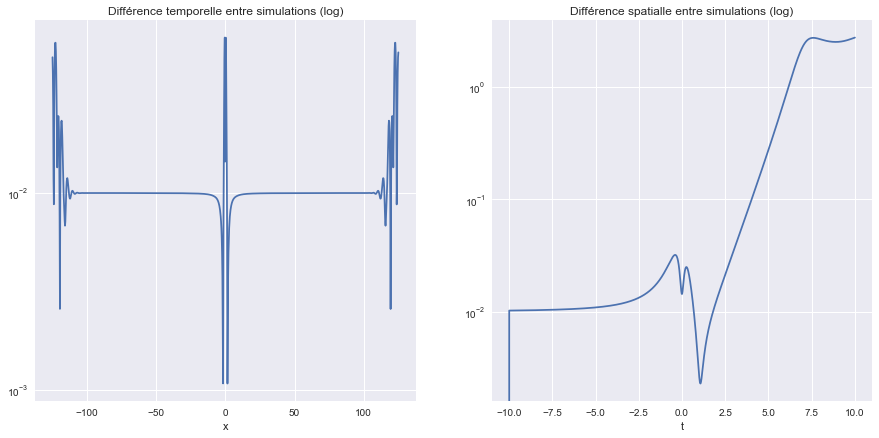

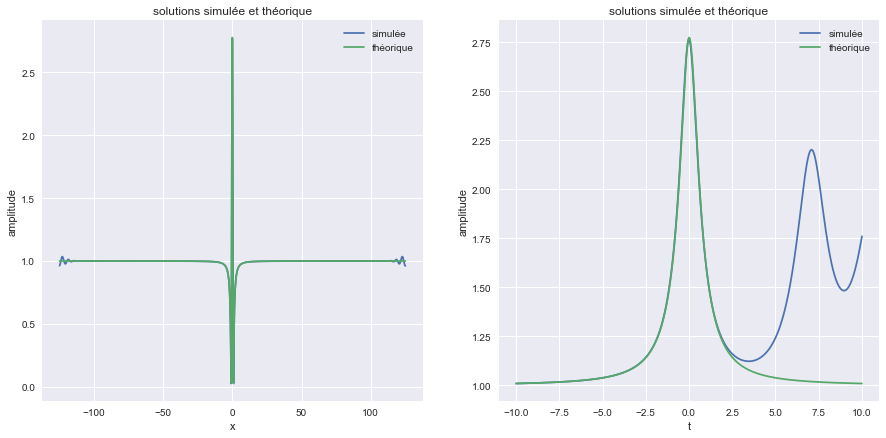

In [36]:
peregrine(250)

Dans ce dernier domaine ($L=250$), nous voyons clairement la ressemblance entre les solutions. Les seules différences se trouvent aux bords de la simulée, ou nous observons des petits pics accumulés et une forte instabilité temporelle, par rapport au centre. En outre, comparant aux graphes des domaines précédents, nous observons que ces effets de bords s'éloignent de plus en plus. 

Nous remarquons donc, que la solution simulée ressemble de plus en plus à la solution exacte lorsque la taille du domaine devient plus grande. Nous pouvons donc dire que la solution simulée tend vers la solution exacte lorsque la taille du domaine $L$ devient très grand, ergo lorsque $L$ devient non-borné.